N19DCCN131 - NGUYỄN HOÀI NHỚ

N21DCCN089 - HỒ ANH TUẤN

N18DCCN100 - VŨ HỒ HUY KHÁNH

In [ ]:
import numpy as np
import sklearn
import pandas as pd
import imblearn
import seaborn as sns
import tensorflow as tf

In [ ]:
import pandas as pd
data = pd.read_csv("Hotel Reservation.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/AI/Hotel Reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data['required_car_parking_space'].replace(0, "No", inplace=True)
data['required_car_parking_space'].replace(1, "Yes", inplace=True)



In [ ]:
data['repeated_guest'].replace(0, "No", inplace=True)
data['repeated_guest'].replace(1, "Yes", inplace=True)

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,Canceled


In [ ]:
data_encode = data.copy()

labels_to_encode = ['type_of_meal_plan', 'room_type_reserved', 
                    'market_segment_type', 'booking_status', 
                    'required_car_parking_space', 'repeated_guest']

for label in labels_to_encode:
    data_encode[label] = data_encode[label].astype('category')
    data_encode[label] = data_encode[label].cat.codes

# check dataset
data_encode.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [ ]:
data_encode2 = data.copy()

cols_to_drop = ['arrival_date', 'arrival_year', 'no_of_previous_cancellations', 
                'no_of_previous_bookings_not_canceled', 'no_of_week_nights', 
                'no_of_weekend_nights', 'no_of_adults', 'no_of_children', 
                'repeated_guest', 'required_car_parking_space', 'Booking_ID', 
                'no_of_special_requests']


data_encode2['type_of_meal_plan'].where(data_encode2['type_of_meal_plan'] == 'Meal Plan 1', 'other', inplace=True)
data_encode2['room_type_reserved'].where(data_encode2['room_type_reserved'] == 'RT1', 'other', inplace=True)
data_encode2['market_segment_type'].where(data_encode2['market_segment_type'] == 'Online', 'other', inplace=True)

data_encode2['no_of_people'] = data_encode2['no_of_adults'] + data_encode2['no_of_children']
data_encode2['no_of_nights'] = data_encode2['no_of_week_nights'] + data_encode2['no_of_weekend_nights']

data_encode2.drop(columns=['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights'])
data_encode2['has_special_requests'] = data_encode2['no_of_special_requests'] > 1. 

data_encode2.drop(columns=cols_to_drop, inplace=True)

data_encode2.head()

,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,market_segment_type,avg_price_per_room,booking_status,no_of_people,no_of_nights,has_special_requests
0,Meal Plan 1,other,224,10,other,65.00,Not_Canceled,2,3,False
1,other,other,5,11,Online,106.68,Not_Canceled,2,5,False
2,Meal Plan 1,other,1,2,Online,60.00,Canceled,1,3,False
3,Meal Plan 1,other,211,5,Online,100.00,Canceled,2,2,False
4,other,other,48,4,Online,94.50,Canceled,2,2,False


In [ ]:
for label in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'has_special_requests']:
    data_encode2[label] = data_encode2[label].astype('category')
    data_encode2[label] = data_encode2[label].cat.codes

data_encode2.head()

,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,market_segment_type,avg_price_per_room,booking_status,no_of_people,no_of_nights,has_special_requests
0,0,0,224,10,1,65.00,1,2,3,0
1,1,0,5,11,0,106.68,1,2,5,0
2,0,0,1,2,0,60.00,0,1,3,0
3,0,0,211,5,0,100.00,0,2,2,0
4,1,0,48,4,0,94.50,0,2,2,0


In [ ]:
def remove_outliers(df, label):
    q1 = df[label].quantile(0.25)
    q3 = df[label].quantile(0.75)
    iqr = (q3 - q1)
    fil = (df[label] >= q1 - 1.5 * iqr) & (df[label] <= q3 + 1.5 * iqr)
    return df.loc[fil]

In [ ]:
data_encode2 = remove_outliers(data_encode2, 'lead_time')
data_encode2 = remove_outliers(data_encode2, 'avg_price_per_room')

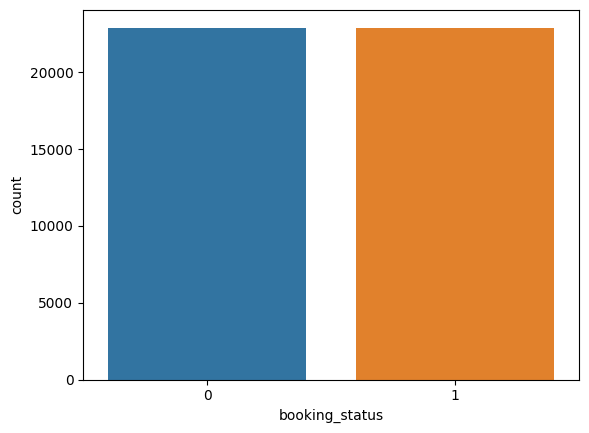

In [ ]:
X = data_encode2.drop('booking_status', axis = 1)
X = X.values
y = data_encode2['booking_status']

ros = imblearn.over_sampling.RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

scaler = sklearn.preprocessing.StandardScaler()
X_standard = scaler.fit_transform(X)

X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_standard, y, test_size = 0.3, random_state = 0)
y_test, y_train = tf.one_hot(y_test, 2).numpy(), tf.one_hot(y_train, 2).numpy()

In [ ]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1])

hidden_layer = []
hidden_layer.append(tf.keras.layers.Dense(1000, activation = 'relu'))
hidden_layer.append(tf.keras.layers.Dropout(0.2))
hidden_layer.append(tf.keras.layers.Dense(200, activation = 'relu'))
hidden_layer.append(tf.keras.layers.Dropout(0.1))
hidden_layer.append(tf.keras.layers.Dense(20, activation = 'relu'))

output_layer = tf.keras.layers.Dense(2, activation = 'sigmoid')

x = input_layer
for i in range(len(hidden_layer)):
    x = hidden_layer[i](x)

model = tf.keras.Model(input_layer, output_layer(x))

In [ ]:
history = model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.fit(X_train, y_test, epochs=100)

In [ ]:
history = model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1003/1003 [==============================] - 12s 9ms/step - loss: 0.5233 - accuracy: 0.7341
Epoch 2/100
1003/1003 [==============================] - 8s 8ms/step - loss: 0.4936 - accuracy: 0.7504
Epoch 3/100
1003/1003 [==============================] - 8s 8ms/step - loss: 0.4845 - accuracy: 0.7602
Epoch 4/100
1003/1003 [==============================] - 8s 8ms/step - loss: 0.4774 - accuracy: 0.7660
Epoch 5/100
1003/1003 [==============================] - 7s 7ms/step - loss: 0.4726 - accuracy: 0.7682
Epoch 6/100
1003/1003 [==============================] - 9s 9ms/step - loss: 0.4681 - accuracy: 0.7715
Epoch 7/100
1003/1003 [==============================] - 7s 7ms/step - loss: 0.4638 - accuracy: 0.7742
Epoch 8/100
1003/1003 [==============================] - 9s 9ms/step - loss: 0.4605 - accuracy: 0.7751
Epoch 9/100
1003/1003 [==============================] - 7s 7ms/step - loss: 0.4573 - accuracy: 0.7766
Epoch 10/100
1003/1003 [==============================] - 8s 8ms/step - loss: 0.4560